## This python notebook will be used to perform calculations to verify the initial assertion that Danish players are taller than German players.

In [29]:
import pandas as pd

In [30]:
players = pd.read_csv('players.csv')
players

,number,position,name,link,caps,goals,nat_team,date_of_birth,age,place_of_birth,height,club
0,1,GK,Manuel Neuer,https://en.wikipedia.org/wiki/Manuel_Neuer,124,0,Germany,1986-03-27,38,"Gelsenkirchen, West Germany",193.0,Bayern Munich
1,12,GK,Oliver Baumann,https://en.wikipedia.org/wiki/Oliver_Baumann,0,0,Germany,1990-06-02,34,"Breisach, West Germany",187.0,TSG Hoffenheim
2,22,GK,Marc-André ter Stegen,https://en.wikipedia.org/wiki/Marc-Andr%C3%A9_...,40,0,Germany,1992-04-30,32,"Mönchengladbach, Germany",187.0,Barcelona
3,2,DF,Antonio Rüdiger,https://en.wikipedia.org/wiki/Antonio_R%C3%BCd...,74,3,Germany,1993-03-03,31,"Berlin, Germany",190.0,Real Madrid
4,3,DF,David Raum,https://en.wikipedia.org/wiki/David_Raum,24,0,Germany,1998-04-22,26,"Nuremberg, Germany",180.0,RB Leipzig
5,4,DF,Jonathan Tah,https://en.wikipedia.org/wiki/Jonathan_Tah,29,0,Germany,1996-02-11,28,"Hamburg, Germany",195.0,Bayer Leverkusen
6,6,DF,Joshua Kimmich,https://en.wikipedia.org/wiki/Joshua_Kimmich,91,6,Germany,1995-02-08,29,"Rottweil, Germany",177.0,Bayern Munich
7,15,DF,Nico Schlotterbeck,https://en.wikipedia.org/wiki/Nico_Schlotterbeck,14,0,Germany,1999-12-01,24,"Waiblingen, Germany",191.0,Borussia Dortmund
8,16,DF,Waldemar Anton,https://en.wikipedia.org/wiki/Waldemar_Anton,4,0,Germany,1996-07-20,28,"Olmaliq, Uzbekistan",189.0,Borussia Dortmund
9,18,DF,Maximilian Mittelstädt,https://en.wikipedia.org/wiki/Maximilian_Mitte...,8,1,Germany,1997-03-18,27,"Berlin, Germany",180.0,VfB Stuttgart


In [31]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          52 non-null     int64  
 1   position        52 non-null     object 
 2   name            52 non-null     object 
 3   link            52 non-null     object 
 4   caps            52 non-null     int64  
 5   goals           52 non-null     int64  
 6   nat_team        52 non-null     object 
 7   date_of_birth   52 non-null     object 
 8   age             52 non-null     int64  
 9   place_of_birth  52 non-null     object 
 10  height          52 non-null     float64
 11  club            50 non-null     object 
dtypes: float64(1), int64(4), object(7)
memory usage: 5.0+ KB


In [32]:
players.describe()

,number,caps,goals,age,height
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,13.500000,41.923077,5.500000,28.288462,185.884615
std,7.573172,38.796021,9.323174,4.169622,5.070692
min,1.000000,0.000000,0.000000,21.000000,174.000000
25%,7.000000,10.000000,0.000000,25.750000,182.000000
50%,13.500000,29.500000,1.000000,28.000000,186.500000
75%,20.000000,67.000000,8.000000,31.000000,190.000000
max,26.000000,134.000000,45.000000,38.000000,199.000000


### 1. Average height of Germany and Denmark national football team

In [33]:
ger = players[players.nat_team == 'Germany']
ger['height'].mean()

185.34615384615384

In [34]:
den = players[players.nat_team == 'Denmark']
den['height'].mean()

186.42307692307693

In [35]:
den['height'].mean() - ger['height'].mean()

1.0769230769230944

On average, Danish players are 1.08 cm taller than German players

### 2. Players of both teams who played in the match

In [36]:
# Germany lineup
ger_nr_list = [6,2,15,3,23,8,19,21,10,7,25,9,20,17,16]
ger_lineup = ger[ger['number'].isin(ger_nr_list)]

# Denmark lineup
den_nr_list = [2,3,6,18,8,23,5,11,10,9,15,20,19,26,17]
den_lineup = den[den['number'].isin(den_nr_list)]

In [57]:
ger_lineup['height'].describe()

count     15.000000
mean     184.800000
std        5.017114
min      177.000000
25%      181.500000
50%      184.000000
75%      189.000000
max      193.000000
Name: height, dtype: float64

In [58]:
den_lineup['height'].describe()

count     15.000000
mean     187.133333
std        4.940600
min      181.000000
25%      183.000000
50%      187.000000
75%      190.500000
max      199.000000
Name: height, dtype: float64

#### Descriptive Statistics
- Central Tendency: The Danish team has a higher mean and median, indicating they are generally taller on average.
- Spread and Variability: Both teams have similar standard deviations, suggesting similar variability in height.
The Danish team has a slightly smaller standard deviation, indicating a more consistent height range.
- Distribution: The Danish team's quartiles and maximum are higher, suggesting that more players are taller across the distribution
- Overall Height: The Danish team is generally taller and more consistent in height than the German team.

In [43]:
den_lineup['height'].mean() - ger_lineup['height'].mean()

2.3333333333333144

On average, the Danish players in that match were 2.33 cm taller than the German players

### 3. Height distribution of the German and Danish players
The boxplot below shows the relatively clear difference in height distribution of the German and Danish players who participated in the match.

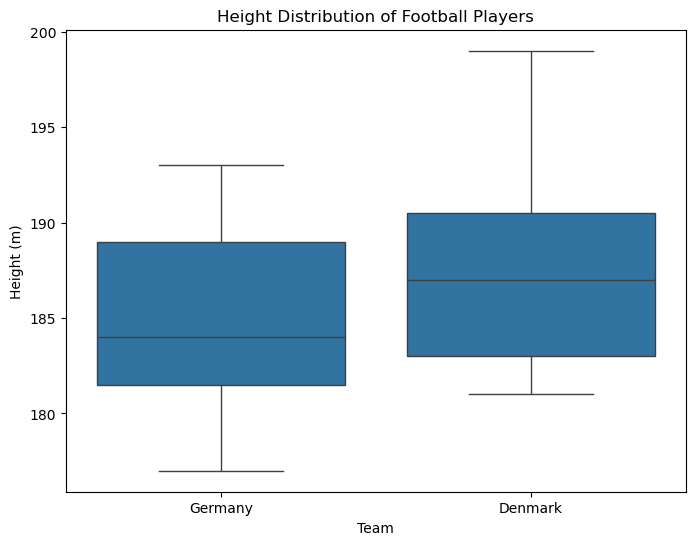

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

lineup = pd.concat([ger_lineup,den_lineup],ignore_index=True)

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='nat_team', y='height', data=lineup)

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Height (m)')
plt.title('Height Distribution of Football Players')

# Show the plot
plt.show()

### 4. Defense vs Offense

I assume that in a corner kick situation for the Danish team, the Danish midfield (MD) and striker (FW) players would participate in the attack. Meanwhile, the players in the midfield (MD) and in the German defense (DF)  would participate in the defense. Let's compare the average height in this situatation

In [40]:
ger_def = ger_lineup[(ger_lineup.position == 'DF') | (ger_lineup.position == 'MF')]
ger_def['height'].mean()

183.84615384615384

In [41]:
den_atk = den_lineup[(den_lineup.position == 'MF') | (den_lineup.position == 'FW')]
den_atk['height'].mean()

186.66666666666666

In [44]:
den_atk['height'].mean() - ger_def['height'].mean()

2.8205128205128176

With this assumption, on average Danish players will be 2.82 cm taller than German players

## Conclusion: 
Through calculations and visualization, my assumption was proven correct. The Danish football team has a taller height distribution than the German team, with higher averages, medians, and overall range, indicating that their players tend to be taller.